In [5]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import zipfile
from datetime import datetime


# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

In [8]:
graph_data = pd.read_csv('graph_data.csv', index_col=0)
graph_data.head()

,Broncos sum,Vikings sum,Everyone else sum,Broncos cnt,Vikings cnt,Everyone else cnt,utcs
0,0.5674,2.3420,0.0000,3.0,6.0,1.0,1.574012e+09
1,0.2481,0.6610,0.8803,2.0,8.0,1.0,1.574012e+09
2,1.9948,-0.7960,0.7568,6.0,22.0,5.0,1.574013e+09
3,4.5784,7.3205,1.5722,17.0,57.0,12.0,1.574014e+09
4,0.8303,3.9771,2.3892,24.0,59.0,15.0,1.574014e+09


In [9]:
times = np.array([datetime.utcfromtimestamp(utc).strftime('%H:%M') for utc in graph_data['utcs']])
times

array(['17:30', '17:40', '17:50', '18:00', '18:10', '18:20', '18:30',
       '18:40', '18:50', '19:00', '19:10', '19:20', '19:30', '19:40',
       '19:50', '20:00', '20:10', '20:20', '20:30', '20:40', '20:50',
       '21:00', '21:10', '21:20', '21:30', '21:40', '21:50', '22:00',
       '22:10', '22:20'], dtype='<U5')

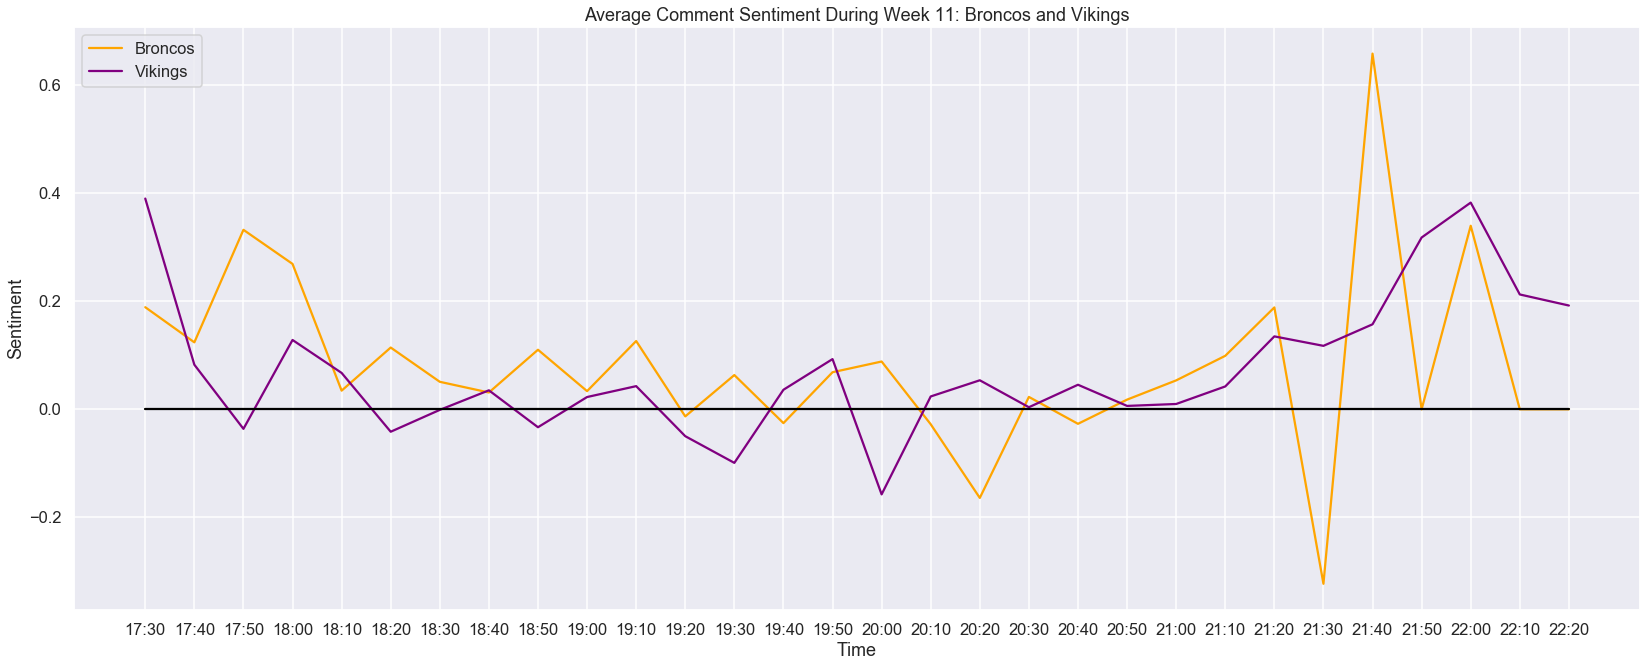

In [30]:
# let's plot
plt.figure(figsize=(25,10))
team_1_avg = graph_data.iloc[:,0].to_numpy() / graph_data.iloc[:,3].replace(0,1).to_numpy()
team_2_avg = graph_data.iloc[:,1].to_numpy() / graph_data.iloc[:,4].replace(0,1).to_numpy()
ee_avg = graph_data.iloc[:,2].to_numpy() / graph_data.iloc[:,5].replace(0,1).to_numpy()

plt.plot(times, team_1_avg, color='orange', label='Broncos')
plt.plot(times, team_2_avg, color='purple', label='Vikings')
plt.plot(times, np.zeros(len(times)), color='black')
# plt.plot(times, ee_avg, color='black')
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.title('Average Comment Sentiment During Week 11: Broncos and Vikings')
plt.legend(loc = 'upper left')
plt.show()
